In [1]:
import os
from collections import defaultdict as dd
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread, imsave
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.color import rgb2gray
import matplotlib.patches as patches
import cv2
import copy
import sympy as sym

In [2]:
rec_pixels = []
with open("rec_pixels.txt", "r") as pix_file:    
    for string in pix_file:
        rec_pixels.append(float(string))

In [3]:
rec_pixels = np.array(rec_pixels)
rec_pixels = np.resize(rec_pixels, (256, 256))
print("mean: ", np.mean(rec_pixels), "min: ", np.min(rec_pixels), "max: ", np.max(rec_pixels))

mean:  0.24565555348115808 min:  -0.24639551776301843 max:  1.0707077291038782


recovery mean 0.24749364618406186 min:  0.0 max:  1.0707077291038782
orig mean:  63.111358642578125 min:  0 max:  255
62.863864996394064 62.86386822871104


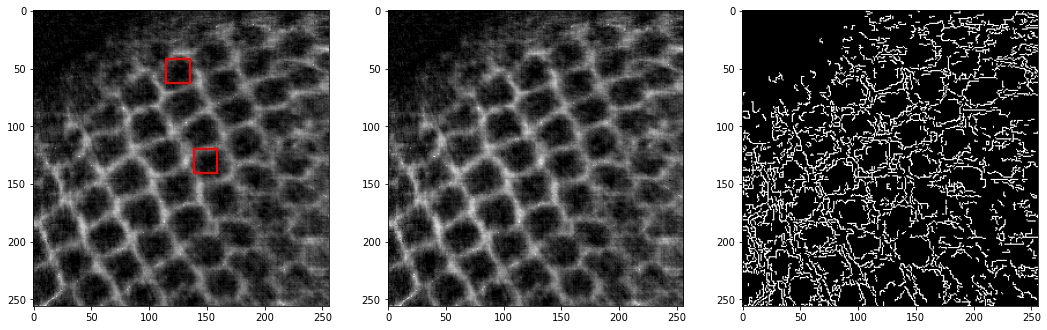

In [4]:
# recovery = (rec_pixels - np.min(rec_pixels)) / (np.max(rec_pixels) - np.min(rec_pixels)) * 2
recovery = rec_pixels
recovery[recovery<0] = 0
print("recovery mean", np.mean(recovery), "min: ", np.min(recovery), "max: ", np.max(recovery))

orig = imread("RecoveryResult/rec_Fas3_1_1_1_2.png")
print("orig mean: ", np.mean(orig), "min: ", np.min(orig), "max: ", np.max(orig))

fig, ax = plt.subplots(1, 3, figsize=(18, 20))
ax[0].imshow(recovery, cmap='gray')
ax[1].imshow(orig, cmap='gray')
rect = patches.Rectangle((115, 42), 20, 20, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)
rect = patches.Rectangle((139, 120), 20, 20, linewidth=2, edgecolor='r', facecolor='none')
ax[0].add_patch(rect)
ax[2].imshow(cv2.Canny(orig,140,230), cmap='gray')

print(np.mean(orig-recovery), np.mean(abs(orig-recovery)))


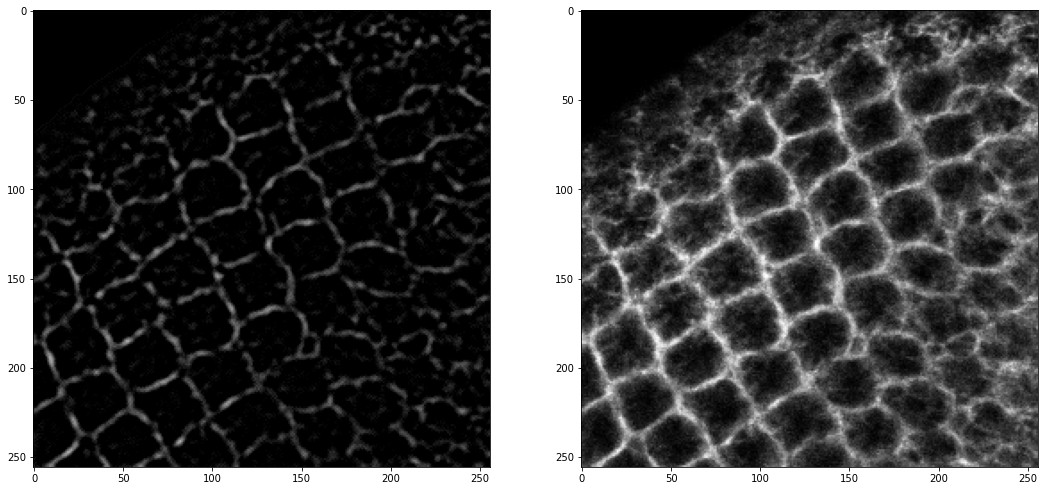

In [5]:
#read image 
img_src = cv2.imread('images2gpfl_256/Fas3_1_1_1_2.png') 

#edge detection filter 
kernel = np.array([[0.0, -1.0, 0.0], [-1.0, 4.0, -1.0], [0.0, -1.0, 0.0]]) 
# kernel = np.array([[-1.0, -1.0], [2.0, 2.0], [-1.0, -1.0]])
# kernel = np.ones((2,2),np.float32)/4

kernel = 6*kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1) 
#filter the source image 
img_rst = cv2.filter2D(cv2.GaussianBlur(img_src,(9,9),0),-1,kernel) 
#save result image 

# cv2.imwrite('result.jpg',img_rst)
fig, ax = plt.subplots(1, 2, figsize=(18, 20))
ax[0].imshow(img_rst, cmap='gray')
ax[1].imshow(img_src, cmap='gray')

In [6]:
all_pixels = []
counter = 0
with open("pixels.txt", "r") as pix_file:
    for string in pix_file:
        pixels = []
        for x in string.split():
            pixels.append(float(x))
        if len(pixels) != 5:
            print('oops', len(pixels), counter)
        all_pixels.append(pixels)
        counter += 1
all_pixels = np.array(all_pixels)

Quartils: [0.         1.15104601 2.65302762], iqr: 2.653e+00
Mean=		8.125e+05;
Variance=	9.362e+13;
Min=		0.000e+00,
max=		1.246e+08


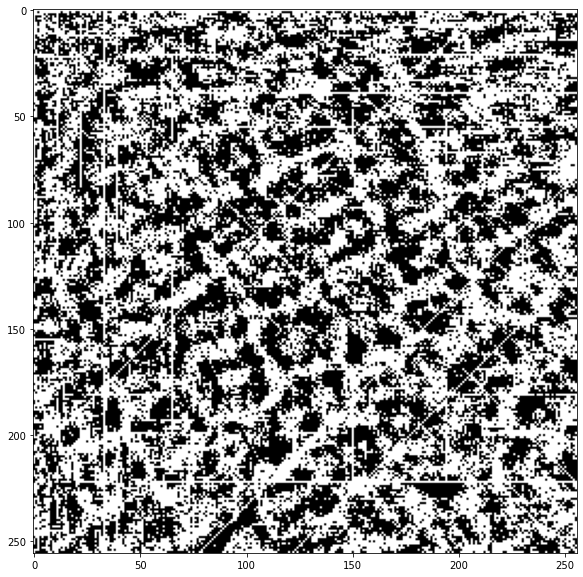

In [26]:
first = all_pixels[:, 0]
maximum = np.max(first[first < np.inf])
first[first == np.inf] = maximum
qs = np.quantile(first, q=[0.25, 0.5, 0.75])
iqr = qs[2] - qs[0]
print(f"Quartils: {qs}, iqr: {iqr:3.3e}")
print(f"Mean=\t\t{np.mean(first):3.3e};\nVariance=\t{np.var(first):3.3e};\nMin=\t\t{min(first):3.3e},\nmax=\t\t{max(first):3.3e}")
first = np.resize(first, (256, 256))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(first > 1, cmap='gray')

# fig, ax = plt.subplots(1, 2, figsize=(18, 20))
# ax[1].imshow(first, cmap='gray')
# ax[1].set_title('Без обработки')
# first[first > qs[2]] = qs[2]
# ax[0].imshow(first, cmap='gray')
# ax[0].set_title(f'Выбросы приравнены значению $q_3+1.5*IQR$')
# rect = patches.Rectangle((115, 42), 20, 20, linewidth=2, edgecolor='r', facecolor='none')
# ax[0].add_patch(rect)
# rect = patches.Rectangle((139, 120), 20, 20, linewidth=2, edgecolor='r', facecolor='none')
# ax[0].add_patch(rect)